In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/posts_avia_telegram.csv")

In [ ]:
df

,id_post,date,text,views,reactions,comments
0,10688,2025-03-27 15:47:35+00:00,"**Попугай кеа, который водится только в Новой ...",820,9,0
1,10687,2025-03-27 12:00:00+00:00,🇹🇷 **В аэропорту Стамбула сделали безлимитный ...,18973,258,59
2,10686,2025-03-27 08:16:29+00:00,"кто потерял ведро\n\nладно, мы просто не знали...",29969,1839,58
3,10683,2025-03-26 16:24:44+00:00,"А где-то сейчас, на сочнейших альпийских лугах...",35325,1211,23
4,10682,2025-03-26 12:34:01+00:00,"Что-то вы бледные, подписчики. Кожа лица сухов...",34782,676,20
...,...,...,...,...,...,...
7649,35,2017-10-06 05:45:21+00:00,«Езжай в Европу» — дежурный совет для одиночны...,2585,5,0
7650,34,2017-10-04 10:11:14+00:00,**Смогли бы работать в такой обстановке?)**\n_...,3286,0,0
7651,33,2017-10-04 10:10:28+00:00,Мы делаем Aviasales из необычного офиса. По су...,3757,21,0
7652,32,2017-10-03 12:10:20+00:00,Мы сделали тест для дорогих читателей. Чтобы в...,4345,6,0


<Axes: xlabel='reactions', ylabel='views'>

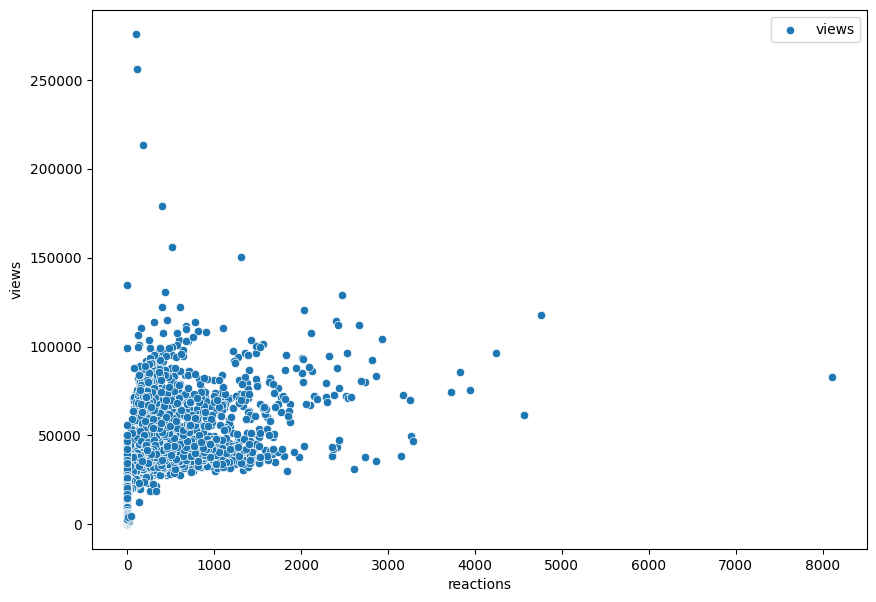

In [ ]:
plt.figure(figsize=(10,7))
y = df['views']
x = df['reactions']
sns.scatterplot(x = x, y = y, label = 'views')

<Axes: xlabel='reactions', ylabel='Count'>

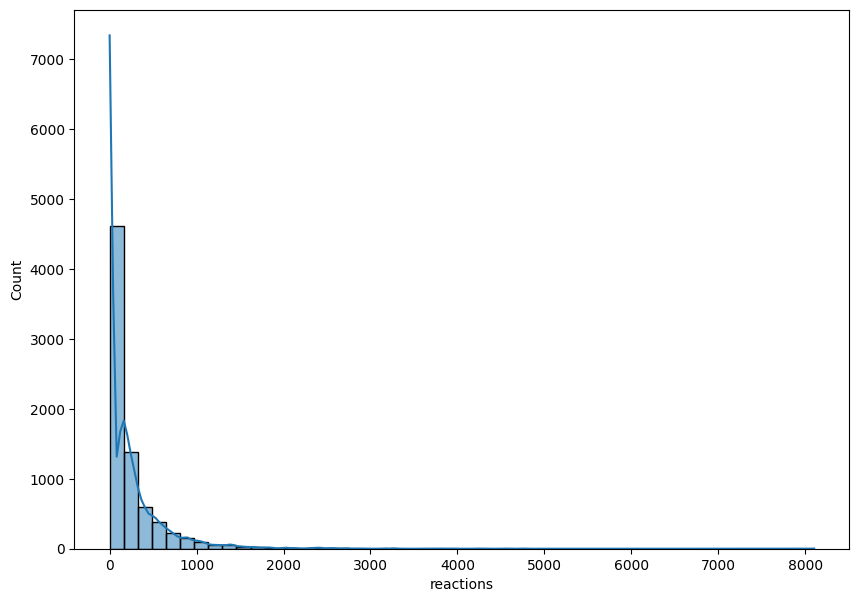

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x = x, bins = 50, kde = True, kde_kws = {'bw_adjust': 0.5})
# Мусор

In [ ]:
df_sort = df.sort_values("views")

<Axes: xlabel='views', ylabel='Count'>

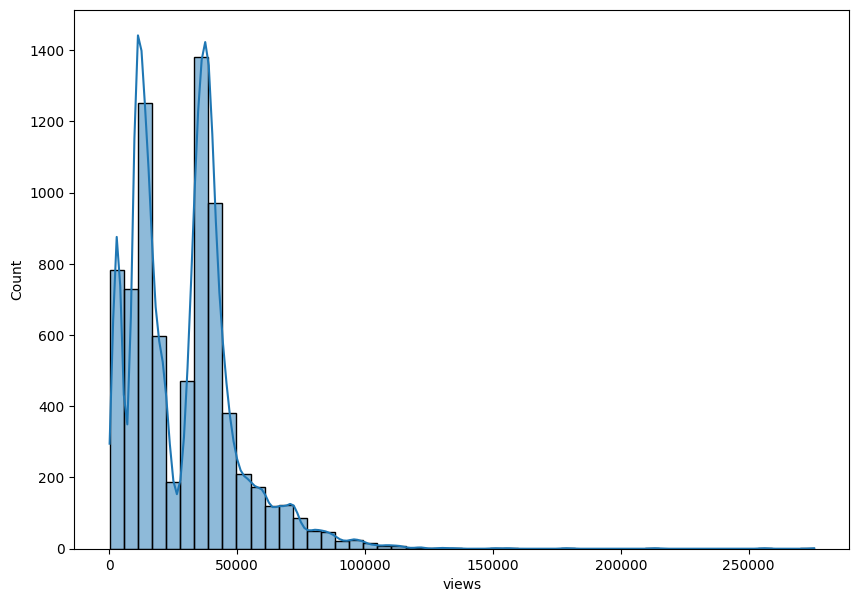

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x = df_sort['views'], bins = 50, kde = True, kde_kws = {'bw_adjust': 0.5})

<ipython-input-25-064336af5dbf>:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



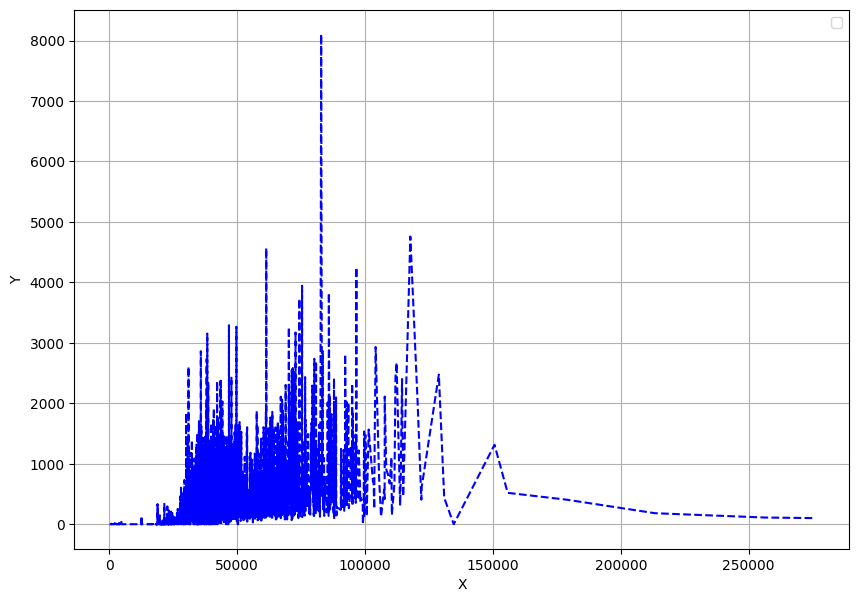

In [ ]:
Data_sort = df.sort_values('views')
x = Data_sort['views']
y = Data_sort['reactions']
plt.figure(figsize=(10,7))
plt.plot(x, y, color='blue', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#plotly

import plotly.express as px

Data_sort = df.sort_values('views')
x = Data_sort['views']
y = Data_sort['reactions']

fig = px.line(x=x, y=y, title='Линейная диаграмма').update_layout(
    xaxis_title="Views", yaxis_title="Reactions")
fig.show()


<ipython-input-49-478354900012>:3: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-49-478354900012>:16: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



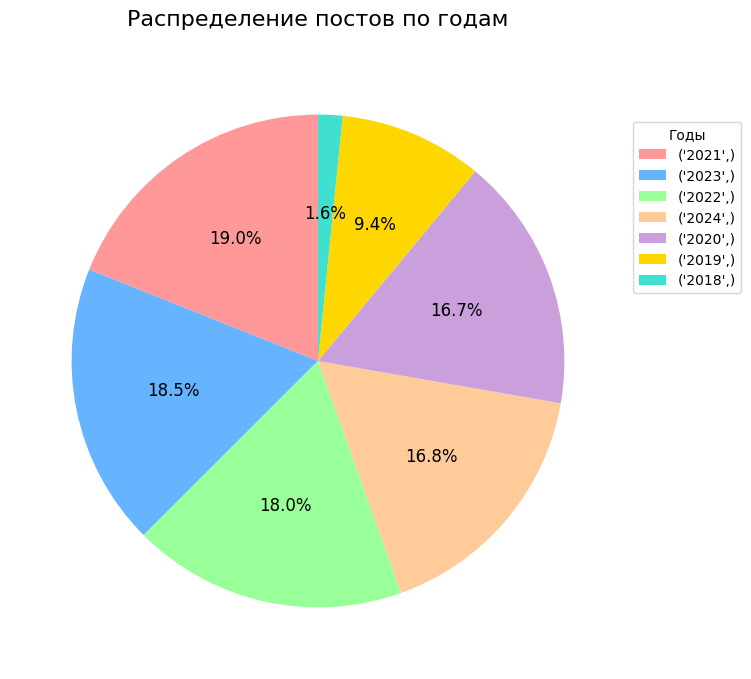

In [ ]:
df_vibe = df["date"].str.extract(r'(?P<Год>\d{4})').value_counts()
plt.figure(figsize=(8, 8))
ax = df_vibe.drop(['2017', '2025']).plot.pie(
    autopct="%.1f%%",
    startangle=90,
    shadow=False,
    labels=None,
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c9a0dc', '#ffd700', '#40e0d0'],
    textprops={'fontsize': 12}
)

plt.title("Распределение постов по годам", fontsize=16, pad=20)
plt.ylabel("")

plt.legend(
    labels=df_vibe.drop(['2017', '2025']).index,
    title="Годы",
    loc="upper left",
    bbox_to_anchor=(1, 0.9)
)

plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df['year'] = df['date'].dt.year
df_avg = df.groupby('year', as_index=False)['views'].mean()


fig = px.line(df_avg, x='year', y='views',
              title='Среднее количество просмотров по годам',
              markers=True)
fig.update_layout(xaxis_title="Год", yaxis_title="Средние просмотры")

fig.show()
